# Regresja liniowa

### Przygotowanie środowiska programistycznego

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as py

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (10, 7),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze oszacowanie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Dane wytorzymy według liniowej zależnośći

$$
{\Huge
y = \theta_0 + \theta_1 \cdot x
}
$$

Ustalamy parametry dla symulacji na $\theta_0 = 1$ i $\theta_1 = 3$. Dla wygody włóżmy oba parametry do wektora (np.array):

$$
{\Huge
\vec{\theta} = (\theta_{0}, \theta_{1})
}
$$

In [38]:
theta0 = 1
theta1 = 3
theta = np.array([theta0, theta1])

Użyjemy **nPoints** równoodległych punktów $x$ i dla nich wygenerujmy punkty wg. założonego modelu. 

Dla wygody dane załadujemy do obiektu DataFrame. By to zrobić musimy zmienić wektor wierszowy na kolumnowy o kształcie $(-1,1)$. 

Użyjemy do tego użyciu funkcji ```reshape()``` (ta zamiana także przyda się w dalszej części ćwiczeń).

In [29]:
nPoints = 100
x = np.linspace(0, 10, nPoints)
x = np.reshape(x, (-1,1))

df = pd.DataFrame(data=x, columns = ["x"])
df["y"] = theta[0] + df["x"]*theta[1]

**Proszę:**

* do danych "czystych" dodać kolumnę z danymi z szumem Gaussowskim: $$ y_{noise} = y + Rand(N(0,1)) $$

In [49]:
# Ciekawostka
# Zwykłe random pseudo-losowe, lepiej użyć default_rng
df["y_noise"] = df["y"] + np.random.default_rng.normal(0,1, size=df["y"].size) 
print(df)

           x          y    y_noise
0    0.00000   1.000000   2.578415
1    0.10101   1.303030   0.375209
2    0.20202   1.606061   1.791066
3    0.30303   1.909091   1.046206
4    0.40404   2.212121   2.119719
..       ...        ...        ...
95   9.59596  29.787879  28.628634
96   9.69697  30.090909  29.925618
97   9.79798  30.393939  29.188889
98   9.89899  30.696970  30.399149
99  10.00000  31.000000  31.231011

[100 rows x 3 columns]


Obejrzyjmy te dane. 

**Proszę narysować:**
* na jednym rysunku: `y vs x` oraz `y_noise vs x`
* na drugim rysunku: histogram `y - y_noise`   

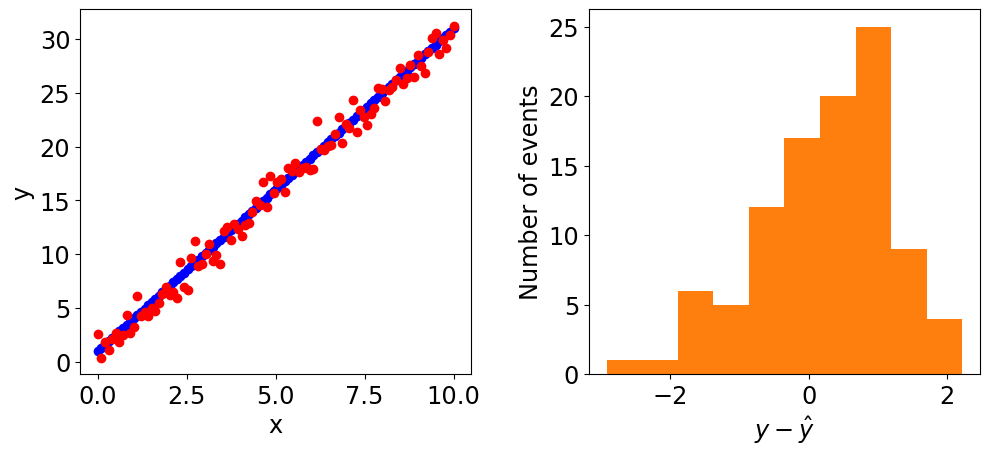

In [51]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(df["x"], df["y"], 'bo', df["x"], df["y_noise"], 'ro')
axes[1].hist(df["y"] - df["y_noise"])

(df["y"] - df["y_noise"]).plot.hist(ax=axes[1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm równań normalnych
**Proszę** napisać funkcję ```normal_equations(x,y)``` która:
* na wejściu przyjmuje macierze $x,y$
* implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ w postaci krotki
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$, a potem na danych zaszumionych $(x ,y_{noise}$)
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: `numpy.linalg.inv`
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

**Wskazówka:** aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

In [52]:
def normal_equations(x,y):
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    theta = np.dot( np.dot(np.linalg.inv( np.dot(x_expanded.T,x_expanded)  ),x_expanded.T) ,y)
    return theta

theta_est = normal_equations(df["x"], df["y"])
print("Prawdziwe wartości parametrów:", theta.T)
print("Wartości estymowane za pomocą równań normalnych dla nominalnych danych:", theta_est.T)

theta_est = normal_equations(df["x"], df["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

Prawdziwe wartości parametrów: [1 3]
Wartości estymowane za pomocą równań normalnych dla nominalnych danych: [1. 3.]
Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [0.76401803 3.00690032]


**Proszę:**

narysować:

* punkty dla danych zaszumionych
* prostą dopasowaną do danych zaszumionych
* prostą dla nominalnych parametrów
* prostą dopasowaną do losowego ułamka próbki, wybranego z użyciem funkcji `pandas.DataFrame.sample()`

Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [0.76401803 3.00690032]
Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [0.29046048 3.11662952] 
dla podpróbki obejmującej 5% przypadków.


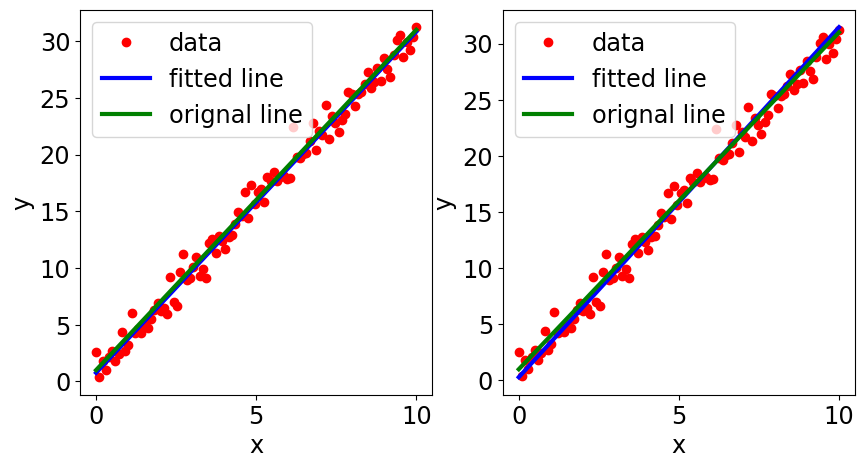

In [59]:
theta_est = normal_equations(df["x"], df["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )
y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

# rysunki dla oryginalnych danych
axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data")
axes[0].plot(df["x"], y_fit, 'b', linewidth=3.0, label = "fitted line")
axes[0].plot(df["x"], y_original, 'g', linewidth=3.0, label="orignal line")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

df_subsample = df.sample(frac=0.05)
theta_est = normal_equations(df_subsample["x"], df_subsample["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: {} \ndla podpróbki obejmującej 5% przypadków.".format(theta_est.T))

y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

# rysunki dla zaszumionych danych
axes[1].plot(df["x"], df["y_noise"], 'ro', label = "data")
axes[1].plot(df["x"], y_fit, 'b', linewidth=3.0, label = "fitted line")
axes[1].plot(df["x"], y_original, 'g', linewidth=3.0, label="orignal line")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend()
pass

## Algorytm gradientowy stochastyczny 

**Proszę** napisać funkcję ```iterative_stochastic_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów x i y, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji `nIter`
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyć, stąd `nIter+1` elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **równą** nominalnej
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **różną** od nominalnej

In [101]:
def iterative_stochastic_gradient(x, y, init_theta, alpha, nIter):
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    indices = np.random.default_rng().integers(low=0, high=len(x)-1, size=(nIter))
    for iteration in range(nIter):
        x_sample = x[indices[iteration]]
        x_sample = np.column_stack((np.ones(1), x_sample))
        y_sample = y[indices[iteration]]
        theta = theta - alpha*(np.dot(theta, x_sample.T) - y_sample) * x_sample
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   


theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 10)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+1, 0.01, 10)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

# Ale gdy zwiększymy liczbe iteracji to dojdziemy do minimum
theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+1, 0.01, 500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta ale ze zwiększoną liczbą iteracji:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.79170292 2.88783147]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta ale ze zwiększoną liczbą iteracji: [1.23607108 2.96178688]


**Proszę** narysować następujące rysunki:
* dane, oraz krzywe regresji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [12.34090544 17.38390521]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [1.35831155 2.00044429]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.7790899  2.81042453]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.53188157 2.77777835]
Oryginalna wartość parametrów: 				 [1 3]


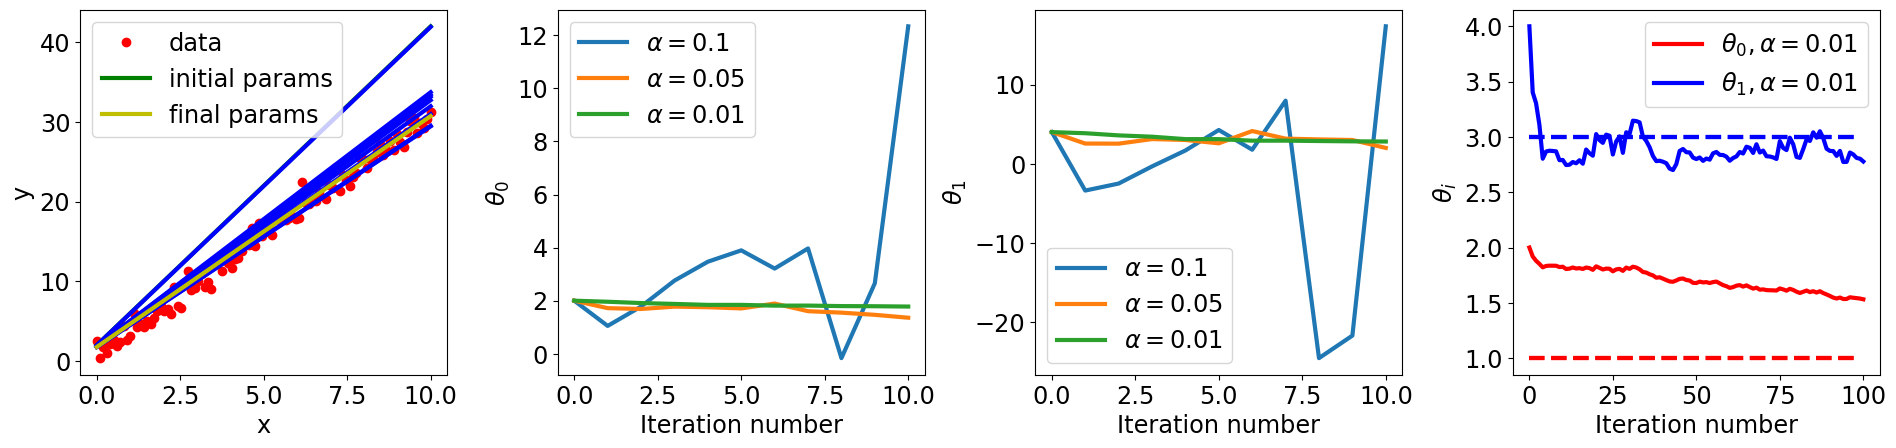

In [110]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data")

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

# rysunki dla y vs x dla danych i prostych dopasowanych w każdej iteracji
axes[0].plot(df["x"], y_fit[:,0], 'g', linewidth=3.0, label = "initial params")
axes[0].plot(df["x"], y_fit[:,1:-1], 'b', linewidth=3.0)
axes[0].plot(df["x"], y_fit[:,-1], 'y', linewidth=3.0, label = "final params")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

theta_alpha_01 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.1, nIter = 10) 
theta_alpha_005 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.05, nIter = 10) 
theta_alpha_001 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 10)
theta_alpha = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 100)

# rysunki dla theta_0
axes[1].plot(theta_alpha_01[:,0], linewidth=3.0, label = r'$\alpha = 0.1$')
axes[1].plot(theta_alpha_005[:,0], linewidth=3.0, label = r'$\alpha = 0.05$')
axes[1].plot(theta_alpha_001[:,0], linewidth=3.0, label = r'$\alpha = 0.01$');axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend()

# rysunki dla theta_1
axes[2].plot(theta_alpha_01[:,1], linewidth=3.0, label = r'$\alpha = 0.1$')
axes[2].plot(theta_alpha_005[:,1], linewidth=3.0, label = r'$\alpha = 0.05$')
axes[2].plot(theta_alpha_001[:,1], linewidth=3.0, label = r'$\alpha = 0.01$');axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend()

# rysunki dla theta_0 i theta_1 w funkcji numeru iteracji dla alpha=0.01
axes[3].plot(theta_alpha[:,0], color="red",  linewidth=3.0, label = r'$\theta_{0},  \alpha = 0.01$')
axes[3].plot(theta_alpha[:,1], color="blue", linewidth=3.0, label = r'$\theta_{1}, \alpha = 0.01$')
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0)
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0)
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend()

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm gradientowy zbiorczy

**Proszę** napisać funkcję ```iterative_batch_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów ```x``` i ```y```, wartości początkowe $(\theta_{0}, \theta_{1})$, 
  parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji ```nIter```
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **równą** nominalnej
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **różną** od nominalnej

In [10]:
%%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    batchSize = len(x)
    for iteration in range(nIter):  
...
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)


print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta+1, alpha=0.01, nIter=500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.06901228 2.9896233 ]
CPU times: user 94.4 ms, sys: 9.03 ms, total: 103 ms
Wall time: 101 ms


**Proszę** narysować następujące rysunki:
* dane oraz krzywe regressji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [ 7956615.02503835 52917027.46691593]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [1193.98763157 7932.67350778]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.79456714 2.87949342]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.53888047 2.91792747]
Oryginalna wartość parametrów: 				 [1 3]


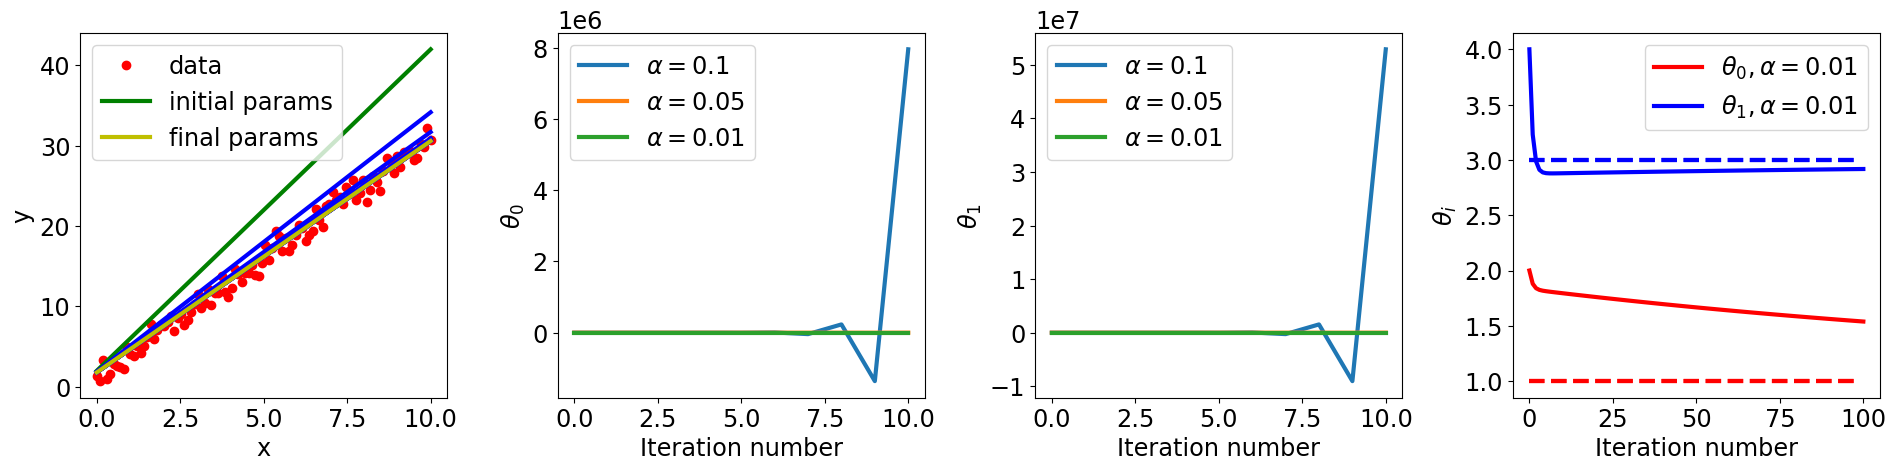

In [11]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

...
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

...

...
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

...
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

...
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Porównanie algorytmów
**Proszę** sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie szum podlega innym rozkładom prawdopodobieństwa niż normalny:

* dla rozkładu jednorodnego w zakresie [-1,1]
* dla rozkłatu t-Studenta o trzech stopniach swobody

Dla wszystkch trzech rozkładów proszę narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 100 iteracji.

In [12]:
...
df["y_tStudent_noise"] = df["y"] + np.random.standard_t(df=3, size=nPoints)
print(df)

           x          y    y_noise  y_flat_noise  y_tStudent_noise
0    0.00000   1.000000   1.320937      0.590503          0.770182
1    0.10101   1.303030   0.712913      1.318809          1.197542
2    0.20202   1.606061   3.294075      1.805813          2.198118
3    0.30303   1.909091   0.986919      1.818142          0.207269
4    0.40404   2.212121   1.621046      2.130801          1.403779
..       ...        ...        ...           ...               ...
95   9.59596  29.787879  28.439153     30.610532         29.807327
96   9.69697  30.090909  30.273500     29.742464         32.908739
97   9.79798  30.393939  29.852198     30.105088         29.827903
98   9.89899  30.696970  32.261743     31.307483         29.687096
99  10.00000  31.000000  30.776812     31.956217         31.139138

[100 rows x 5 columns]


**Proszę:**
* narysować histogramy różnicy zaszumionej i oryginalnej wartości y dla trzech typów szumu: Gaussa, płaskiego, t-Studenta

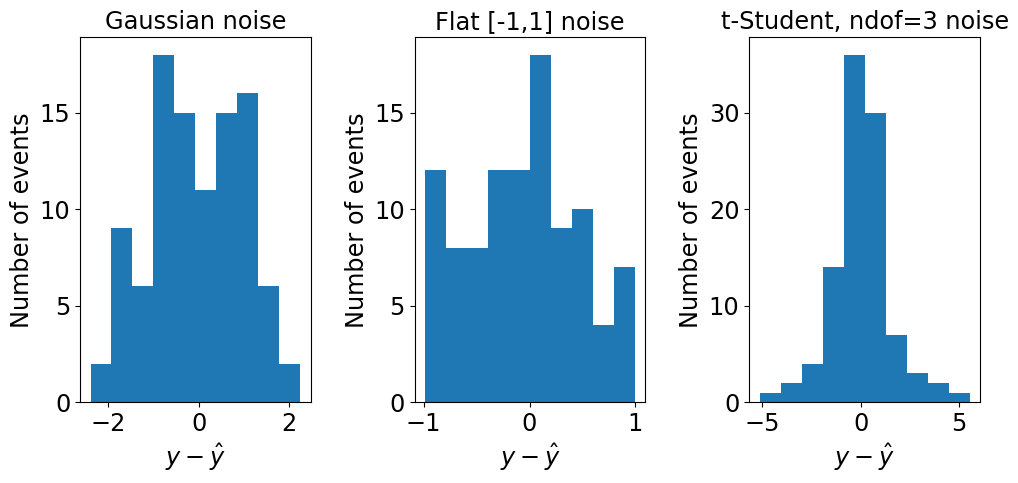

In [13]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

...

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events");

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.45)

# Zadanie domowe

**Proszę:**
* narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 200 iteracji dla każdego z rodzajów szumu

Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: 	 [1.36146265 2.94460404]
Finalna wartość parametrów dla szumu płaskiego, nIter = 100: 		 [1.34061244 2.95910733]
Finalna wartość parametrów dla szumu tStudenta, nIter = 100: 		 [1.22272948 2.96689015]
Oryginalna wartośc parametrów: 					 [1 3]
CPU times: user 142 ms, sys: 4.43 ms, total: 147 ms
Wall time: 143 ms


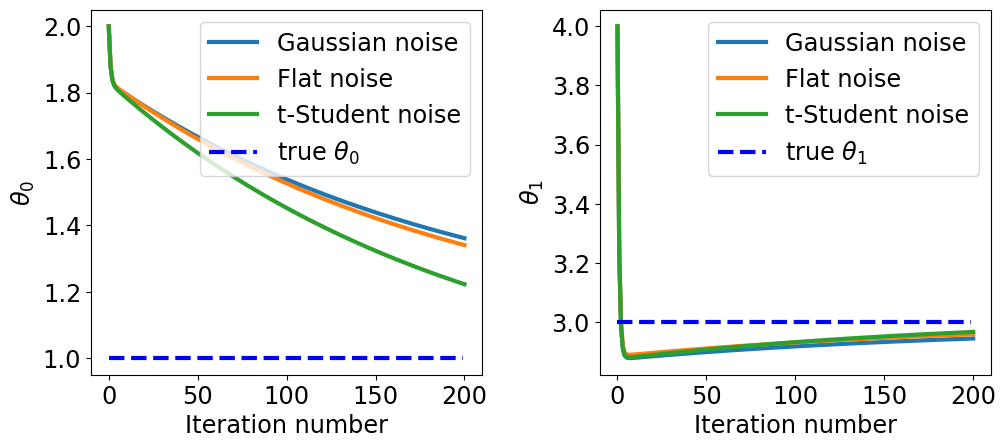

In [14]:
%%time
fig, axes = plt.subplots(1,2, figsize=(10,5))

nIter = 200
...

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

...
axes[0].plot(np.full(nIter,theta[0]),  "--b",linewidth=3.0, label=r"true $\theta_{0}$");
axes[0].set_xlabel("Iteration number")
axes[0].set_ylabel(r'$\theta_{0}$')
axes[0].legend();

...
axes[1].plot(np.full(nIter,theta[1]), "--b",  linewidth=3.0, label=r"true $\theta_{1}$");
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{1}$')
axes[1].legend();

print("Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: \t",theta_gaussian_noise[-1])
print("Finalna wartość parametrów dla szumu płaskiego, nIter = 100: \t\t",theta_flat_noise[-1])
print("Finalna wartość parametrów dla szumu tStudenta, nIter = 100: \t\t",theta_tStudent_noise[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)